# CLUSTERING - EMPLEADOS
1. Preparación de datos: variables numéricas se deben normalizar y variables categóricas se crean dummies
2. Aprendizaje del modelo: Kmeans, método del codo/rodilla
3. Evaluación del modelo: Inertia, silueta
4. Perfilamiento: Descripción de centroides

In [ ]:
#Importamos librerías básicas
import pandas as pd #manipulación dataframes
import numpy as np #matrices y vectores
import matplotlib.pyplot as plt #gráficas


## 1. Preparación de Datos
- Previa limpieza de atípicos, nulos y altas correlaciones

In [ ]:
# Se cargan los datos
df=pd.read_csv('final_description_numeric.csv') #cargar datos
df.head() #muestra los primeros 5 registros
#todos los datos que estoy cargando se almacena en una variable que se llama df o data

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                           0                      0   
1                                           0                      0   
2                                           0                      0   
3                                           0                      0   
4                                           0                      0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                     1                      0  ...                0.0   
1                     0                      0  ...                0.0   
2                     1                      0  ...                0.0   
3                     1                      0  ...                0.0   
4                     0                      0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0           0.698113           0.000000          0.056604   
1                0.0           0.969231           0.538462          0.107692   
2                0.0           1.000000           0.000000          0.000000   
3                0.0           1.000000           0.000000          0.000000   
4                0.0           0.987654           0.679012          0.111111   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0            3.0000   
1                0.0                0.0                0.0            2.6250   
2                0.0                0.0                0.0            1.7500   
3                0.0                0.0                0.0            1.7500   
4                0.0                0.0                0.0            3.3125   

   causa_retiro  
0             1  
1             0  
2             1  
3             1  
4             1  

[5 rows x 95 columns]

In [ ]:
#Se revisan los tipos de datos
df.info()
#hay en total 270 filas con 9 columnas (variables), me dice los no nulos para verificar que no tenga y el tipo de variable (numérica o categórica)
#los tipos de variable son: int-float-object (se cambia a categoria)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 95 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Desc_Cargo_AUXILIAR ADMINSTRATIVO           252 non-null    int64  
 1   Desc_Cargo_AUXILIAR AMBIENTAL               252 non-null    int64  
 2   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  252 non-null    int64  
 3   Desc_Cargo_CADENERO I                       252 non-null    int64  
 4   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF        252 non-null    int64  
 5   Desc_Cargo_CONTROLADOR VIAL                 252 non-null    int64  
 6   Desc_Cargo_INGENIERO AUXILIAR               252 non-null    int64  
 7   Desc_Cargo_INSPECTOR SST I                  252 non-null    int64  
 8   Desc_Cargo_OFICIAL I                        252 non-null    int64  
 9   Desc_Cargo_OFICIAL II                       252 non-null    int64  
 10  Desc_Cargo_OPE

In [ ]:
#Descripción estadística de variables numéricas
df.describe()

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
count                         252.000000                     252.000000   
mean                            0.007937                       0.003968   
std                             0.088909                       0.062994   
min                             0.000000                       0.000000   
25%                             0.000000                       0.000000   
50%                             0.000000                       0.000000   
75%                             0.000000                       0.000000   
max                             1.000000                       1.000000   

       Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
count                                  252.000000             252.000000   
mean                                     0.011905               0.003968   
std                                      0.108673               0.062994   
min                                      0.000000               0.000000   
25%                                      0.000000               0.000000   
50%                                      0.000000               0.000000   
75%                                      0.000000               0.000000   
max                                      1.000000               1.000000   

       Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
count                            252.000000                   252.000000   
mean                               0.051587                     0.007937   
std                                0.221633                     0.088909   
min                                0.000000                     0.000000   
25%                                0.000000                     0.000000   
50%                                0.000000                     0.000000   
75%                                0.000000                     0.000000   
max                                1.000000                     1.000000   

       Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
count                     252.000000                  252.000000   
mean                        0.007937                    0.007937   
std                         0.088909                    0.088909   
min                         0.000000                    0.000000   
25%                         0.000000                    0.000000   
50%                         0.000000                    0.000000   
75%                         0.000000                    0.000000   
max                         1.000000                    1.000000   

       Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
count            252.000000             252.000000  ...         252.000000   
mean               0.246032               0.055556  ...           0.005751   
std                0.431554               0.229517  ...           0.024725   
min                0.000000               0.000000  ...           0.000000   
25%                0.000000               0.000000  ...           0.000000   
50%                0.000000               0.000000  ...           0.000000   
75%                0.000000               0.000000  ...           0.000000   
max                1.000000               1.000000  ...           0.142857   

       houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  \
count         252.000000         252.000000         252.000000   
mean            0.000015           0.934180           0.401726   
std             0.000134           0.106196           0.267230   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.916667           0.146008   
50%             0.000000           0.969231           0.456574   
75%             0.000000           1.000000           0.583333   
max             0.001432           1.000000           0.991385   

       houses_TP9_2_USO  houses_TP14_6_TIP  houses

  Instalar nueva librería

In [ ]:
#Cargar librería para Profiling
!pip install ydata-profiling

In [ ]:
# Perfilado de datos
from ydata_profiling import ProfileReport

#este perfilado nos da mucha información mínima de cada una de las variables y saca alertas

profile_data=ProfileReport(df, minimal=True) # minimal=False
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 95/95 [00:00<00:00, 110.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#No se ha balanceo porque no hay variable objetivo
#Transformaciones: normalizar y crear dummies

#Hacer una copia de datos por si uno se equivoca
data=df.copy()

In [ ]:
#Normalizacion de variables numéricas
from sklearn.preprocessing import MinMaxScaler
#la libreria sklearn tiene todo lo de machine learning, esta organizada en carpetas según las funciones
#El minmaxscaler es el que hace la normalización en un rango de 0 a 1

min_max_scaler = MinMaxScaler()
variables_a_normalizar= ["Desc_Cargo_AUXILIAR ADMINSTRATIVO","Desc_Cargo_AUXILIAR AMBIENTAL","Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES","Desc_Cargo_CADENERO I","Desc_Cargo_CONDUCTOR DE VOLQUETA DAF","Desc_Cargo_CONTROLADOR VIAL","Desc_Cargo_INGENIERO AUXILIAR","Desc_Cargo_INSPECTOR SST I","Desc_Cargo_OFICIAL I","Desc_Cargo_OFICIAL II","Desc_Cargo_OPERADOR DE RETROEXCAVADORA","Desc_Cargo_OPERADOR GRUA TELESCOPICA","Desc_Cargo_PERFORISTA -LANZADOR","Desc_Cargo_SOLDADOR I","Desc_Cargo_nan","Proyecto_CONTRATO PUENTE CALLE 26","Proyecto_CONTRATO SUBESTRUCTURA S2","Proyecto_nan","genero_M","genero_nan","id_tipo_contrato_1.0","id_tipo_contrato_5.0","id_tipo_contrato_nan","id_estado_civil_1.0","id_estado_civil_2.0","id_estado_civil_5.0","id_estado_civil_7.0","id_estado_civil_nan","id_turno_0.0","id_turno_2.0","id_turno_3.0","id_turno_nan","salario_mes","anios","DENSIDAD","TP9_3_USO","TP9_2_1_MI","TP9_2_3_MI","TP9_2_9_MI","TP9_3_1_NO","TP9_3_2_NO","TP9_3_3_NO","TP9_3_5_NO","TP9_3_6_NO","TP9_3_7_NO","TP9_3_10_N","TP9_3_99_N","TP14_1_TIP","TP14_3_TIP","TP14_5_TIP","TP15_3_OCU","TP19_EE_2","TP19_EE_E1","TP19_EE_E4","TP19_EE_E9","TP19_ACU_2","TP19_ALC_2","TP19_GAS_2","PERSONAS_S","CD_LC_CM","permanencia","persons_TP51_13_ED","persons_TP51SUPERI","persons_TP51SECUND","persons_TP51PRIMAR","persons_TP51_99_ED","persons_TP34_6_EDA","persons_TP34_8_EDA","persons_TP34_7_EDA","persons_TP34_3_EDA","persons_TP34_5_EDA","persons_TP34_9_EDA","persons_TP34_4_EDA","persons_TP34_2_EDA","persons_TP34_1_EDA","persons_TP32_1_SEX","persons_TP32_2_SEX","persons_TP51POSTGR","houses_TP9_1_USO","houses_TP19_INTE1","houses_TP19_GAS_1","houses_TP19_ACU_1","houses_TP19_GAS_9","houses_TP19_EE_E2","houses_TP19_EE_E3","houses_TP19_EE_E5","houses_TP19_EE_E6","houses_TP15_1_OCU","houses_TP14_2_TIP","houses_TP9_2_USO","houses_TP14_6_TIP","houses_TP15_2_OCU","houses_TP14_4_TIP","homes_TP27_PERSO","causa_retiro"] #para que sea algo independiente y después se puedan hacer cambios de datos
min_max_scaler.fit(data[variables_a_normalizar]) #Ajuste de parámetro #fit es que haga el aprendizaje
data[variables_a_normalizar]= min_max_scaler.transform(data[variables_a_normalizar]) #luego del aprendizaje, se debe aplicar sobre la variable
#tambien existe uno que se llama fit_transform que hace lo mismo en 1 solo
data.head() #almacenar las variables transformadas en las variables originales

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                         0.0                    0.0   
1                                         0.0                    0.0   
2                                         0.0                    0.0   
3                                         0.0                    0.0   
4                                         0.0                    0.0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                   0.0                          0.0   
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                   0.0                          0.0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                   1.0                    0.0  ...                0.0   
1                   0.0                    0.0  ...                0.0   
2                   1.0                    0.0  ...                0.0   
3                   1.0                    0.0  ...                0.0   
4                   0.0                    0.0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0           0.698113           0.000000          0.145553   
1                0.0           0.969231           0.543140          0.276923   
2                0.0           1.000000           0.000000          0.000000   
3                0.0           1.000000           0.000000          0.000000   
4                0.0           0.987654           0.684913          0.285714   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0          0.517241   
1                0.0                0.0                0.0          0.387931   
2                0.0                0.0                0.0          0.086207   
3                0.0                0.0                0.0          0.086207   
4                0.0                0.0                0.0          0.625000   

   causa_retiro  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 95 columns]

## 2. Aprendizaje del Modelo

- Método del codo/rodilla
- Aplicar Kmeans

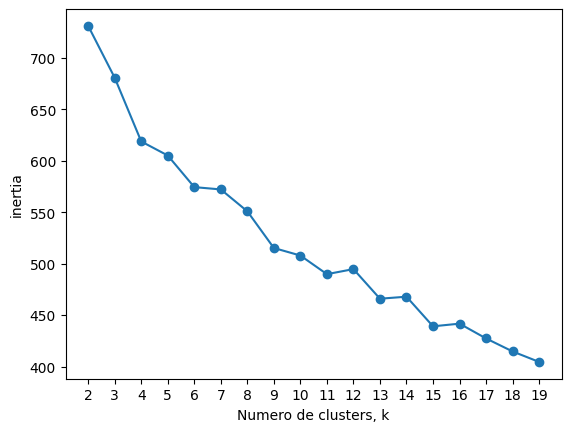

In [ ]:
#Método del codo para encontrar la mejor cantidad de clusters: inertia
from sklearn.cluster import KMeans

ks = range(2, 20) # crear valores del 2 al 20, para probar con 2 cluster hasta 20
inertias = [] #está vacío

for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data) #fit hace entrenamiento, con distancias - centroides
    inertias.append(model.inertia_) #en Kmeans se almacenan los centroides, los labels (que tiene cada cluster) y la inercia
    #con model.inertia saco lo que me dio la inercia que esta en el modelo y lo agrego en el vector

# Graficar cantidad de clusters vs inertias
#Recuerdo que cuando quiero un gráfico siempre pongo plt
plt.plot(ks, inertias, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks) #que ponga los diferentes puntos
plt.show() #muestra la gráfica

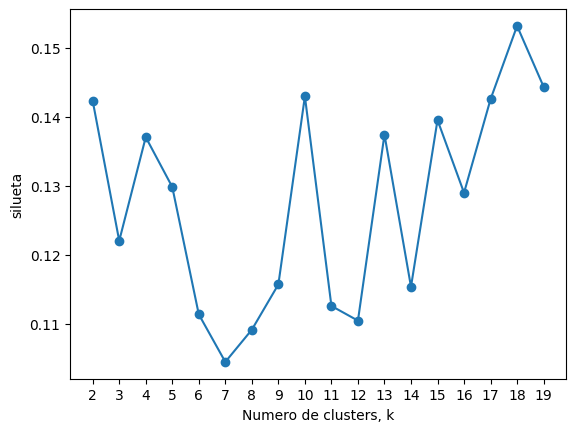

In [ ]:
#Método de la rodilla: silueta
from sklearn import metrics

ks = range(2, 20) # crear valores del 2 al 20
siluetas = []

for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data)
    sil=metrics.silhouette_score(data, model.labels_) #la silueta se debe calcular por aparte
    #para calcular la silueta necesito la librería metrics
    siluetas.append(sil)
    #la silueta sirve despues de 0,5 y es excelente despues de 0,7

# Graficar cantidad de clusters vs inertias
plt.plot(ks, siluetas, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('silueta')
plt.xticks(ks)
plt.show()

In [ ]:
#Creación de modelo de clustering con Kmeans
from sklearn.cluster import KMeans
k=6
model = KMeans(n_clusters=k, max_iter=300)
model.fit(data) #100% datos
#cada vez que entreno un modelo, me muestran una caja para confirmar que se entrenó un modelo

KMeans(n_clusters=6)

## 3. Evaluación del Modelo

- Inertia: valor pequeño esperado
- Silueta: valor positivo esperado, idealmente mayor a 0.5

In [ ]:
#Evaluación
from sklearn import metrics

#Inertia: se require valor pequeño
print('Inercia o cohesión:', model.inertia_)

#Silueta: se requiere que sea positivo, ideal 0.5-1.0
sil=metrics.silhouette_score(data, model.labels_)
print('Silueta:',sil)

Inercia o cohesión: 564.2648846175188
Silueta: 0.12684227038082443


## 4. Perfilamiento

### Descripción de los centroides

In [ ]:
#Centroides de los cluster se convierten  en un dataframe de pandas
centroides=pd.DataFrame(model.cluster_centers_, columns=data.columns.values)
centroides.round(1) #con esto quiero ver los centroides que ya estan en el modelo pero en un panda
#round 1 me redondea a un solo decimal
#estos no los entiendo porque estan normalizados

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
5                                0.0                            0.0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                         0.0                    0.0   
1                                        -0.0                    0.0   
2                                         0.0                    0.0   
3                                         0.0                    0.0   
4                                        -0.0                    0.0   
5                                         0.0                    0.0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                   0.1                          0.0   
1                                  -0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.1                          0.0   
4                                  -0.0                          0.0   
5                                  -0.0                          0.0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
5                            0.0                         0.0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                   0.3                    0.0  ...               -0.0   
1                   0.0                    0.1  ...                0.3   
2                   0.2                    0.2  ...                0.0   
3                   0.2                    0.1  ...                0.0   
4                   0.5                    0.0  ...               -0.0   
5                   0.1                    0.0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0                1.0                0.6               0.2   
1               -0.0                0.9                0.2               0.0   
2                0.0                0.9                0.3               0.1   
3                0.0                1.0                0.3               0.1   
4                0.0                1.0                0.5               0.2   
5                0.0                0.9                0.4               0.1   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0               0.4   
1                0.0                0.0                0.0               0.2   
2                0.0                0.1                0.0               0.5   
3                0.0                0.0                0.0               0.5   
4                0.0                0.0                0.0               0.4   
5                0.0                0.1                0.0               0.5   

   causa_retiro  
0           0.4  
1           0.4  
2          -0.0  
3           1.0  
4           0.5  
5           0.5  

[6 rows x 95 columns]

In [ ]:
# Se realiza una des-normalización centroides
centroides[variables_a_normalizar]=min_max_scaler.inverse_transform(centroides[variables_a_normalizar])
centroides.round(0)

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
5                                0.0                            0.0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                         0.0                    0.0   
1                                        -0.0                    0.0   
2                                         0.0                    0.0   
3                                         0.0                    0.0   
4                                        -0.0                    0.0   
5                                         0.0                    0.0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                   0.0                          0.0   
1                                  -0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                  -0.0                          0.0   
5                                  -0.0                          0.0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
5                            0.0                         0.0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                   0.0                    0.0  ...               -0.0   
1                   0.0                    0.0  ...                0.0   
2                   0.0                    0.0  ...                0.0   
3                   0.0                    0.0  ...                0.0   
4                   0.0                    0.0  ...               -0.0   
5                   0.0                    0.0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0                1.0                1.0               0.0   
1               -0.0                1.0                0.0               0.0   
2                0.0                1.0                0.0               0.0   
3                0.0                1.0                0.0               0.0   
4                0.0                1.0                1.0               0.0   
5                0.0                1.0                0.0               0.0   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0               3.0   
1                0.0                0.0                0.0               2.0   
2                0.0                0.0                0.0               3.0   
3                0.0                0.0                0.0               3.0   
4                0.0                0.0                0.0               3.0   
5                0.0                0.0                0.0               3.0   

   causa_retiro  
0           0.0  
1           0.0  
2          -0.0  
3           1.0  
4           0.0  
5           0.0  

[6 rows x 95 columns]

### Descripción de Perfiles

**Perfil 1:** Salario de $5´961.111, con hijos, incapacidades 15 días al año, con una antiguedad de 7 años, son casados, tienen carro pero no tienen casa propia ni pertenecen al sindicato, son de género masculino.

In [ ]:
#En el dataframe original, se adiciona el cluster asignado a cada registro
df['cluster']=model.labels_
df.head()

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                           0                      0   
1                                           0                      0   
2                                           0                      0   
3                                           0                      0   
4                                           0                      0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E6  \
0                     1                      0  ...                0.0   
1                     0                      0  ...                0.0   
2                     1                      0  ...                0.0   
3                     1                      0  ...                0.0   
4                     0                      0  ...                0.0   

   houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  houses_TP14_6_TIP  \
0           0.698113           0.000000          0.056604                0.0   
1           0.969231           0.538462          0.107692                0.0   
2           1.000000           0.000000          0.000000                0.0   
3           1.000000           0.000000          0.000000                0.0   
4           0.987654           0.679012          0.111111                0.0   

   houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  causa_retiro  \
0                0.0                0.0            3.0000             1   
1                0.0                0.0            2.6250             0   
2                0.0                0.0            1.7500             1   
3                0.0                0.0            1.7500             1   
4                0.0                0.0            3.3125             1   

   cluster  
0        5  
1        0  
2        3  
3        3  
4        5  

[5 rows x 96 columns]

In [ ]:
#Almacenar resultados
df.to_excel('./resultados_Kmeans.xlsx')
centroides.to_excel('./centroides.xlsx')

<Axes: ylabel='count'>

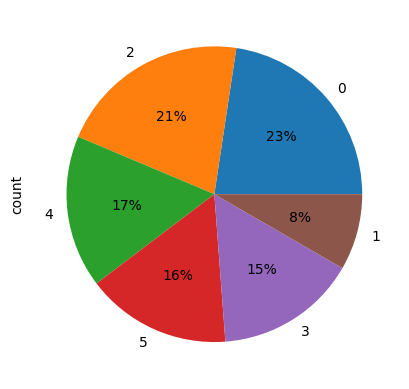

In [ ]:
#Cantidad de datos en cada cluster
df["cluster"].value_counts().plot(kind='pie',autopct='%.0f%%')